<a href="https://colab.research.google.com/github/srkpriyanka95/Book-Recommendation-System./blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    -  Book Recommendation System**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

## ***Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import missingno as msno
import re


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
books_df=pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project/Book Recommendation System/Copy of Books.csv",low_memory=False)
ratings_df=pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project/Book Recommendation System/Copy of Ratings.csv",low_memory=False)
users_df=pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project/Book Recommendation System/Copy of Users.csv",low_memory=False)

### Dataset First View

In [4]:
# Dataset First Look
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# Viewing the 1st five observations in ratings dataframe
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Viewing the 1st five observations in users dataframe
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
# Shape of all three datasets
print(f'Shape of Users DataSet :{users_df.shape}')
print(f'Shape of Books DataSet :{books_df.shape}')
print(f'Shape of Ratings Dataset :{ratings_df.shape}')

Shape of Users DataSet :(278858, 3)
Shape of Books DataSet :(271360, 8)
Shape of Ratings Dataset :(1149780, 3)


### Dataset Merging

In [138]:
# merging all three dataframes into single dataframe
# Merging ratings and user data frame using User Id column
user_rating_df = pd.merge(ratings_df,users_df,on='User-ID',how='left')

# Merging user_rating dataframe and books usinf 'ISBN' column
data=pd.merge(user_rating_df,books_df,on='ISBN',how='inner')

In [139]:
# Shape of the merged data frame
print(f'Shape of the merged Dataset :{data.shape}')

Shape of the merged Dataset :(1031136, 12)


In [140]:
# Viewing the first 5 obserrvations in the Merged Dataset
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg


In [141]:
# Dropping the image URL columns
data.drop(columns={'Image-URL-S','Image-URL-M','Image-URL-L'},inplace=True)

### Dataset Information

In [134]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book-Rating          1031136 non-null  int64  
 3   Location             1031136 non-null  object 
 4   Age                  753301 non-null   float64
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031135 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 78.7+ MB


#### Duplicate Values

In [135]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [136]:
# Missing Values/Null Values Count
data.isna().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Location                    0
Age                    277835
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
dtype: int64

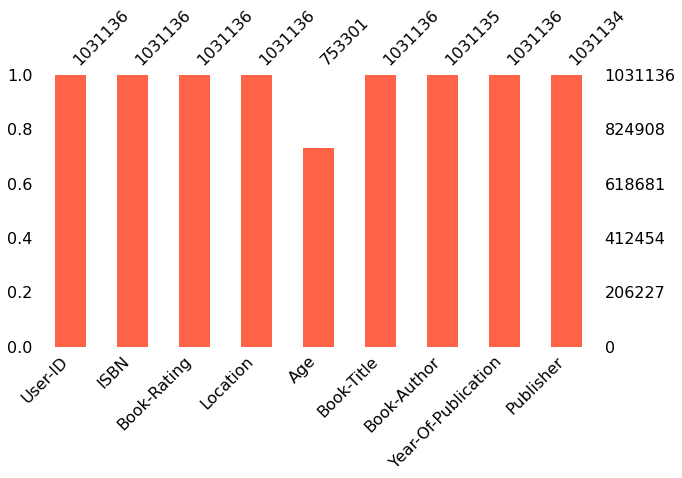

In [137]:
# Visualizing the missing values
msno.bar(data,figsize=(10,5),color='Tomato')

### What did you know about your dataset?

Answer Here

## ***Understanding Your Variables***

In [71]:
# Dataset Columns
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [72]:
# Dataset Describe
data.describe()

,User-ID,Book-Rating,Age
count,1.031136e+06,1.031136e+06,753301.000000
mean,1.405945e+05,2.839051e+00,37.397648
std,8.052466e+04,3.854157e+00,14.098254
min,2.000000e+00,0.000000e+00,0.000000
25%,7.041500e+04,0.000000e+00,28.000000
50%,1.412100e+05,0.000000e+00,35.000000
75%,2.114260e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


### Variables Description 

Answer Here

## ***Data Warangling***

### Check Unique Values for each variable.

In [73]:
# Check Unique Values for each variable.
data.nunique()

User-ID                 92106
ISBN                   270151
Book-Rating                11
Location                22480
Age                       141
Book-Title             241071
Book-Author            101588
Year-Of-Publication       118
Publisher               16729
Image-URL-S            269842
Image-URL-M            269842
Image-URL-L            269839
dtype: int64

In [74]:
# Checking the unique values in Book Rating column
data['Book-Rating'].unique()

array([ 0,  5,  9,  8,  6,  7,  4, 10,  3,  2,  1])

In [75]:
data['Year-Of-Publication'].unique()

array(['2002', '2001', '1996', '1999', '1998', '1994', '1995', '2003',
       '1997', '2024', '1992', '1983', '2000', '0', '1989', '1991',
       '1993', '1976', '1990', '1982', '1988', '1981', '1986', '1987',
       '1980', '2004', '1984', '1985', '1979', '1974', '1977', '1965',
       '1972', '1978', '1962', '1957', '1958', '1960', '1963', '1969',
       '1970', '1975', '1959', '1968', '1971', '1973', '1950', '1964',
       '1955', '1953', '1966', '1930', '1961', '1952', '1940', '1954',
       '1967', '1911', '1946', '1941', '1920', '1956', '1942', '1951',
       '1948', '2005', '1943', '1937', '1923', '1945', '1947', '1936',
       '1925', '1927', '2030', '2011', '2020', '1939', '1926', '1938',
       '1904', '1949', '1932', '1929', '1944', '1933', '1922', '1897',
       '2050', '1902', '1924', '1921', '1900', '2038', '2010', '1928',
       '2006', '1901', '2026', '2021', '1931', '1378', '1908',
       'DK Publishing Inc', 'Gallimard', '1909', '2012', '2008', '1935',
       '1376', 

In [76]:
# seeing the observations with non numeric values in year of publication column
pd.set_option('display.max_colwidth', None)
data.query('`Year-Of-Publication` == "Gallimard" | `Year-Of-Publication` == "DK Publishing Inc"')

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
911154,130571,0789466953,0,"summerville, south carolina, usa",NaN,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN
918145,137190,2070426769,0,"rennes, bretagne, france",31.0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
949657,169663,078946697X,0,"towson, maryland, usa",NaN,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
949658,227771,078946697X,7,"savion, n/a, israel",19.0,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN


In [77]:
# writing a function to swap the values in author, publisher and year of publication
def swap(index):
  author = re.findall(";(\D+)",data.at[index,'Book-Title'])
  year=data.at[index,'Book-Author']
  publisher=data.at[index,'Year-Of-Publication']
  book = re.sub('(\\";\D+")|(\\\\";\D+")',"",data.at[index,'Book-Title'])
  data.at[index,'Book-Title'] = book
  data.at[index,'Book-Author'] = author[0][:-1]
  data.at[index,'Publisher'] = publisher
  data.at[index,'Year-Of-Publication'] = year

# Getting the index of the observations with data shifted
shifted_observ = data.query('`Year-Of-Publication` == "Gallimard" | `Year-Of-Publication` == "DK Publishing Inc"').index

# swapping the misplaced data in the datframe using swap function created
for index in shifted_observ:
  swap(index)

In [78]:
# Checking whether the changes are made correctly
data.loc[shifted_observ]

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
911154,130571,0789466953,0,"summerville, south carolina, usa",NaN,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN
918145,137190,2070426769,0,"rennes, bretagne, france",31.0,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
949657,169663,078946697X,0,"towson, maryland, usa",NaN,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
949658,227771,078946697X,7,"savion, n/a, israel",19.0,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN


In [79]:
# Converting the year of publishing column into int
data['Year-Of-Publication']=data['Year-Of-Publication'].astype(int)

In [80]:
# Finding the year with maximum books published
data['Year-Of-Publication'].value_counts()

2002    91800
2001    79801
1999    75194
2003    72539
2000    72329
        ...  
2008        1
2012        1
2024        1
1378        1
1910        1
Name: Year-Of-Publication, Length: 116, dtype: int64

In [85]:
# replacing columns having inappropriate years with 2002
data['Year-Of-Publication']=data['Year-Of-Publication'].apply(lambda x: 2002 if x>2022 else x)
data['Year-Of-Publication']=data['Year-Of-Publication'].apply(lambda x: 1900 if x<1900 else x)
data['Year-Of-Publication']=data['Year-Of-Publication'].apply(lambda x: 2002 if x==0 else x)
# Checking whether changes are made
print(f"Latest year of publication :{data['Year-Of-Publication'].max()}\nFirst year of publication :{data['Year-Of-Publication'].min()}")

Latest year of publication :2021
First year of publication :1900


In [169]:
# Creating a seperate column for Country
data['Country'] = data['Location'].str.extract('\D*,\D*,(\D+)')


In [173]:
# Checking the unique values in age column
data['Age'].unique()

array([ nan,  23.,  34.,   2.,  45.,  24.,  36.,  35.,  51.,  39.,  52.,
        72.,  30.,  46.,  41.,  33.,  29.,  21.,  38.,  63.,  26.,  59.,
        44.,   1.,  25.,  54.,  27.,  28.,  16.,  20.,  17.,  56.,  32.,
        61.,  53.,  31.,  40.,  37.,  43.,  50.,  15.,  19., 201.,  49.,
        47.,  60.,  69.,  42.,  22.,  18.,  64.,  58.,  68.,  48.,  14.,
        62.,  71.,  57., 204., 209.,   9.,  67.,  55.,   0., 101.,  66.,
       116.,  13.,  75.,  70., 103., 220.,  65.,  83.,  11.,  10.,  12.,
         8.,  76., 200.,  73.,  92.,  80.,  79., 223.,  90., 100.,   7.,
        74.,   3.,  77., 104.,  85.,  82., 128.,  81., 140., 152.,  84.,
       239.,  78., 148.,  97.,   5., 168.,   4., 151., 147., 136., 228.,
        99.,  98.,  93.,  94., 114., 157., 133., 141., 108.,  86., 237.,
        96., 146., 212., 219., 124., 229.,  89., 226.,   6., 244., 105.,
       199., 123., 118., 156., 138.,  95., 132., 127., 109., 107.])

In [208]:
# Finding the mean age to fill in the nan values and in appropriate values in age column
mean_age = round(data.query('Age <= 80 and Age >=15')['Age'].mean())

# replacing the inappropriate age data with the mean value
data['Age']=data['Age'].apply(lambda x: mean_age if x>80 and x<15 else x)
data['Age'] = data['Age'].fillna(mean_age)

In [209]:
# Checking whether we still have any null values in the age column
data['Age'].isna().sum()

0

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 **

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here